#PREPROCESSING THE GIVEN AIR QUALITY DATASET

1.REMOVING THE NULL VALUES

2.OUTLIER DETECTION

3.OBTAINING THE PREPROCESSED DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/cpcb_dly_aq_tamil_nadu-2014.csv")

In [3]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [4]:
# Assuming 'data' is the name of your DataFrame
data_types = data.dtypes
print(data_types)


Stn Code                            int64
Sampling Date                      object
State                              object
City/Town/Village/Area             object
Location of Monitoring Station     object
Agency                             object
Type of Location                   object
SO2                               float64
NO2                               float64
RSPM/PM10                         float64
PM 2.5                            float64
dtype: object


In [5]:
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])

creating new column called Month for future analytics processing

In [6]:
# Assuming 'data' is the name of your DataFrame
data['Month'] = data['Sampling Date'].dt.month

# Define a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Apply the mapping to create a new column with month names
data['Month Name'] = data['Month'].map(month_names)

# Drop the 'Month' column if you don't need it anymore
data.drop(columns=['Month'], inplace=True)

# Rearrange columns
data = data[['Stn Code', 'Sampling Date', 'Month Name', 'State', 'City/Town/Village/Area',
             'Location of Monitoring Station', 'Agency', 'Type of Location', 'SO2', 'NO2', 'RSPM/PM10']]




In [7]:
data.head()

,Stn Code,Sampling Date,Month Name,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10
0,38,2014-01-02,January,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0
1,38,2014-01-07,January,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0
2,38,2014-01-21,January,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0
3,38,2014-01-23,January,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0
4,38,2014-01-28,January,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0


#1.REMOVING THE NULL VALUES

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Stn Code                           0
Sampling Date                      0
Month Name                         0
State                              0
City/Town/Village/Area             0
Location of Monitoring Station     0
Agency                             0
Type of Location                   0
SO2                               11
NO2                               13
RSPM/PM10                          4
dtype: int64


In [9]:
#total number of rows given
num_rows = data.shape[0]
print(f'The dataset contains {num_rows} rows.')


The dataset contains 2879 rows.


#1.1 VISUALIZING THE NULL VALUED FEATURES TO DETERMINE THE METHOD TO FILL THE DATA


SINCE THE DATASET HAS LESS NUMBER OF ROWS REMOVING THEM WILL RESULT IN LACK OF ACCURACY

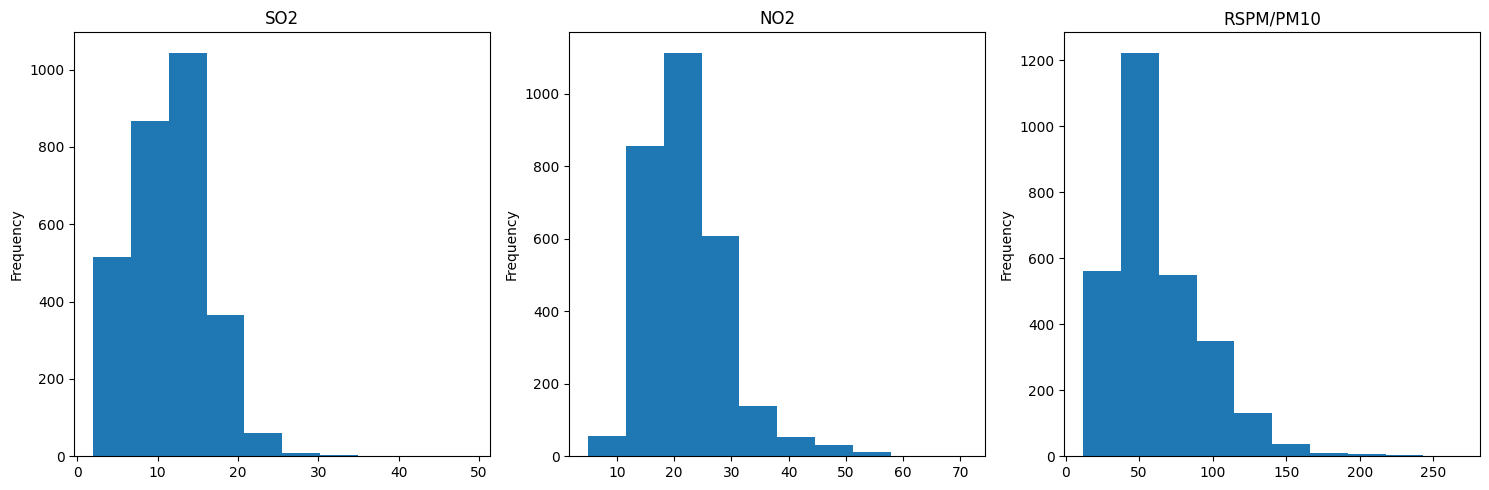

In [10]:
import matplotlib.pyplot as plt

# Create subplots for each column with missing values
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for SO2, NO2, and RSPM/PM10
data['SO2'].plot(kind='hist', ax=axes[0], title='SO2')
data['NO2'].plot(kind='hist', ax=axes[1], title='NO2')
data['RSPM/PM10'].plot(kind='hist', ax=axes[2], title='RSPM/PM10')

plt.tight_layout()
plt.show()


#1.2 REPLACING THE NULL VALUES WITH THEIR RESPECTIVE MEAN VALUES

In [11]:
# Fill missing values with mean
data['SO2'].fillna(data['SO2'].mean(), inplace=True)
data['NO2'].fillna(data['NO2'].mean(), inplace=True)
data['RSPM/PM10'].fillna(data['RSPM/PM10'].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_filling = data.isnull().sum()
print(missing_values_after_filling)


Stn Code                          0
Sampling Date                     0
Month Name                        0
State                             0
City/Town/Village/Area            0
Location of Monitoring Station    0
Agency                            0
Type of Location                  0
SO2                               0
NO2                               0
RSPM/PM10                         0
dtype: int64


#2. OUTLIER DETECTION

In [12]:
import numpy as np

# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection to numerical columns (SO2, NO2, RSPM/PM10)
outliers = detect_outliers(data[['SO2', 'NO2', 'RSPM/PM10']])

# Print the number of outliers for each column
print(outliers.sum())


SO2            0
NO2            0
RSPM/PM10    621
dtype: int64


#2.1 USING SCATTER PLOT TO VISUALIZE THE OUTLIERS

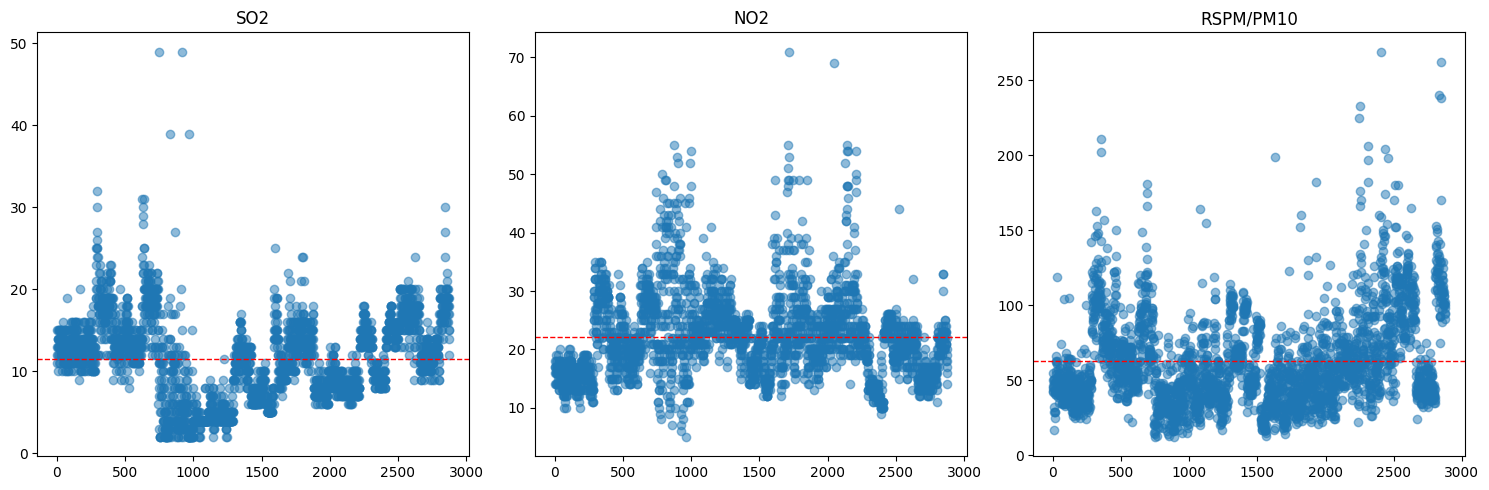

In [13]:
# Calculate mean values
mean_so2 = data['SO2'].mean()
mean_no2 = data['NO2'].mean()
mean_rspm_pm10 = data['RSPM/PM10'].mean()

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot scatter plots for SO2, NO2, and RSPM/PM10 against index
axes[0].scatter(data.index, data['SO2'], alpha=0.5)
axes[0].axhline(mean_so2, color='red', linestyle='dashed', linewidth=1)
axes[0].set_title('SO2')

axes[1].scatter(data.index, data['NO2'], alpha=0.5)
axes[1].axhline(mean_no2, color='red', linestyle='dashed', linewidth=1)
axes[1].set_title('NO2')

axes[2].scatter(data.index, data['RSPM/PM10'], alpha=0.5)
axes[2].axhline(mean_rspm_pm10, color='red', linestyle='dashed', linewidth=1)
axes[2].set_title('RSPM/PM10')

plt.tight_layout()
plt.show()


#2.2 REMOVING THE OUTLIER

In [14]:
import numpy as np

# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection to numerical columns (SO2, NO2, RSPM/PM10)
outliers_so2 = detect_outliers(data['SO2'])
outliers_no2 = detect_outliers(data['NO2'])
outliers_rspm_pm10 = detect_outliers(data['RSPM/PM10'])

# Remove outliers
data = data[~(outliers_so2 | outliers_no2 | outliers_rspm_pm10)]

# Reset index after removing rows
data.reset_index(drop=True, inplace=True)

# Verify that outliers are removed
print(f'Number of rows after removing outliers: {data.shape[0]}')


Number of rows after removing outliers: 2697


#3.OBTAINING THE PREPROCESSED DATA

In [15]:
# Assuming 'data' is your cleaned DataFrame
data.to_csv('/content/air_data.csv', index=False)


In [16]:
data  = pd.read_csv('/content/air_data.csv')

In [17]:
# Assuming your data is stored in a pandas DataFrame called 'data'
# First, let's group the data by 'City/Town/Village/Area'

avg_levels_by_area = data.groupby('City/Town/Village/Area')[['SO2', 'NO2', 'RSPM/PM10']].mean()


In [18]:
avg_levels_by_area

,SO2,NO2,RSPM/PM10
City/Town/Village/Area,,,
Chennai,12.879902,20.686464,58.129348
Coimbatore,4.531153,25.204626,48.669491
Cuddalore,8.983129,19.727276,61.881757
Madurai,13.089888,23.962547,44.707865
Mettur,8.423645,22.995074,52.128079
Salem,8.116071,25.535714,63.089286
Thoothukudi,12.826439,18.280278,74.050922
Trichy,15.042056,18.412784,80.263768


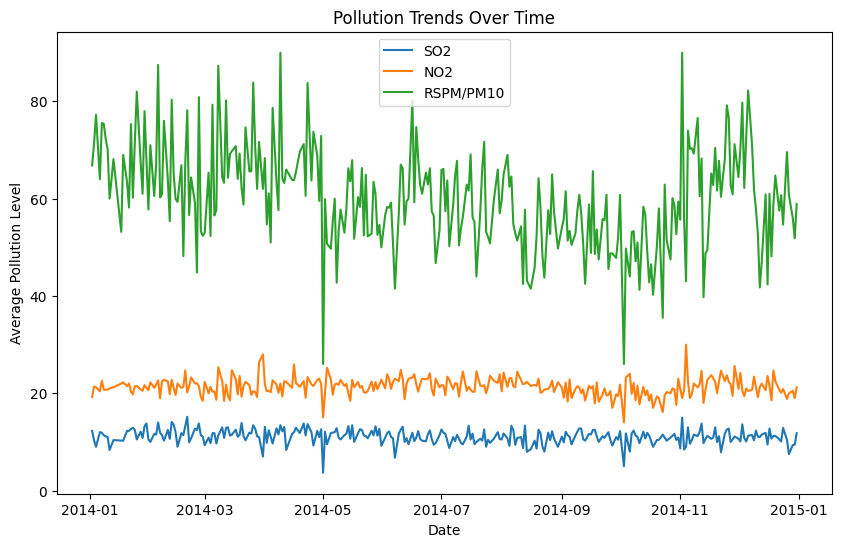

In [19]:
# To identify trends, we can plot a time series of the pollution levels

import matplotlib.pyplot as plt

# Assuming 'Sampling Date' is a datetime column
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])

# Group data by date and calculate average levels
avg_levels_by_date = data.groupby('Sampling Date')[['SO2', 'NO2', 'RSPM/PM10']].mean()

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(avg_levels_by_date.index, avg_levels_by_date['SO2'], label='SO2')
plt.plot(avg_levels_by_date.index, avg_levels_by_date['NO2'], label='NO2')
plt.plot(avg_levels_by_date.index, avg_levels_by_date['RSPM/PM10'], label='RSPM/PM10')
plt.xlabel('Date')
plt.ylabel('Average Pollution Level')
plt.title('Pollution Trends Over Time')
plt.legend()
plt.show()

# To identify areas with high pollution levels, we can sort the DataFrame we created in Step 1
high_pollution_areas = avg_levels_by_area.sort_values(by=['SO2', 'NO2', 'RSPM/PM10'], ascending=False)


In [20]:
# Assuming 'data' is your DataFrame and 'Sampling Date' is a datetime column
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])

# Group data by location and date, and calculate average levels
avg_levels_by_location_date = data.groupby(['City/Town/Village/Area', 'Sampling Date'])[['SO2', 'NO2', 'RSPM/PM10']].mean().reset_index()


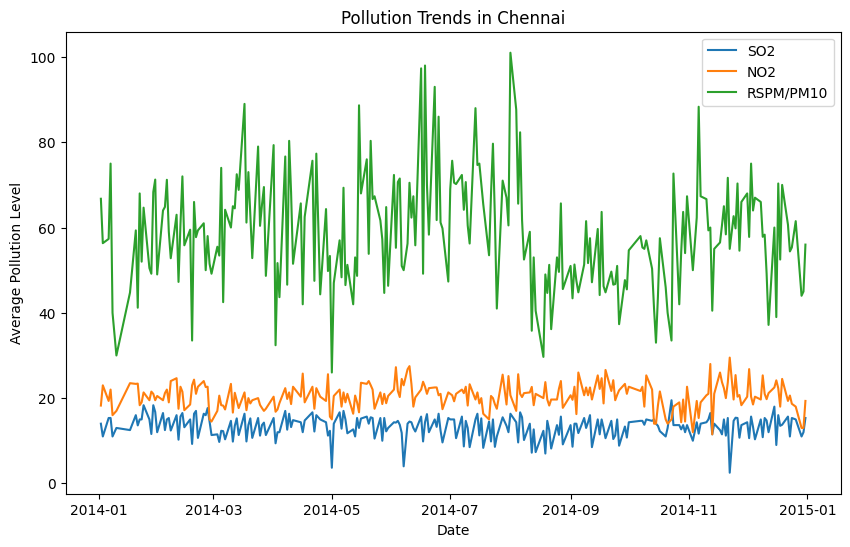

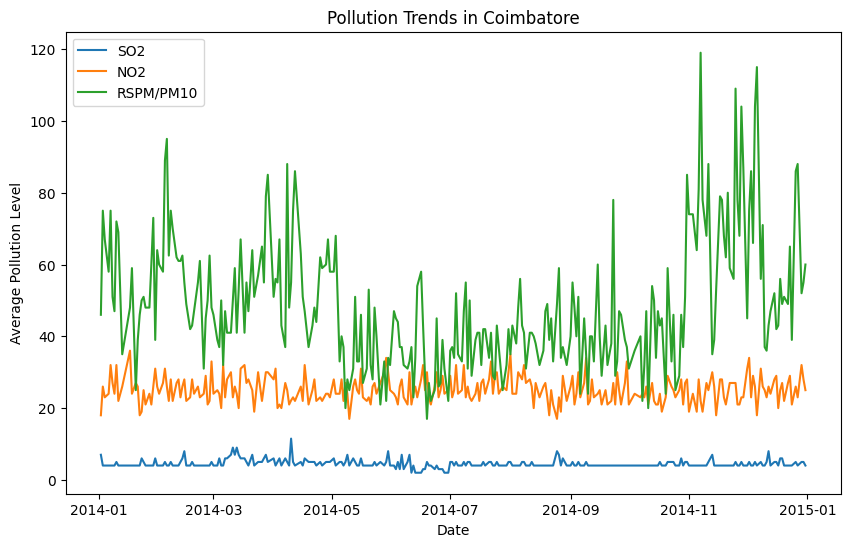

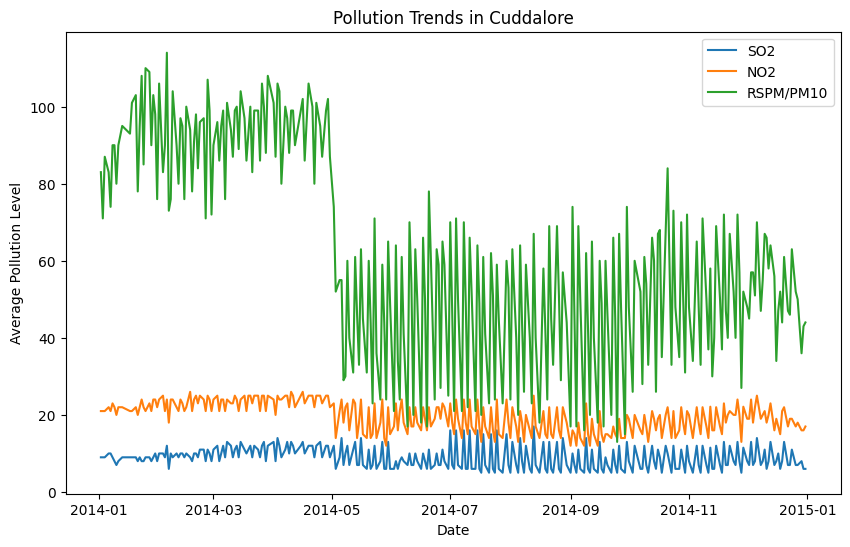

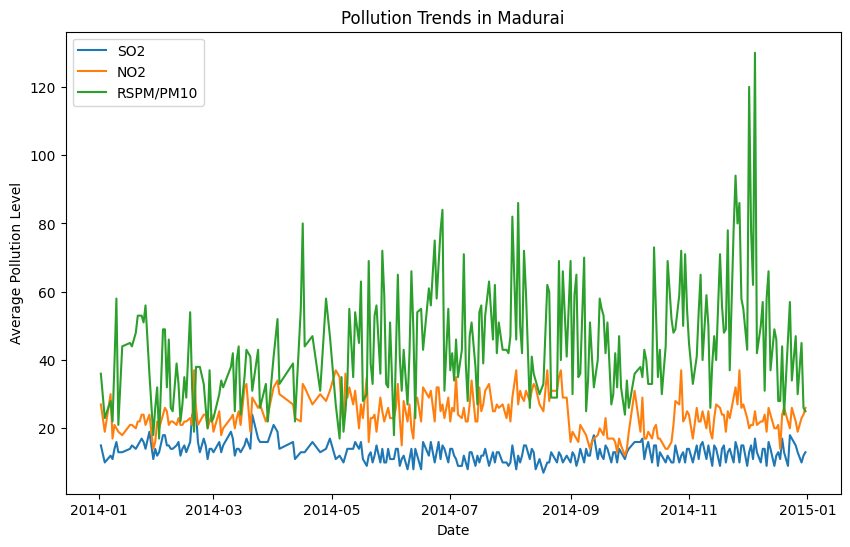

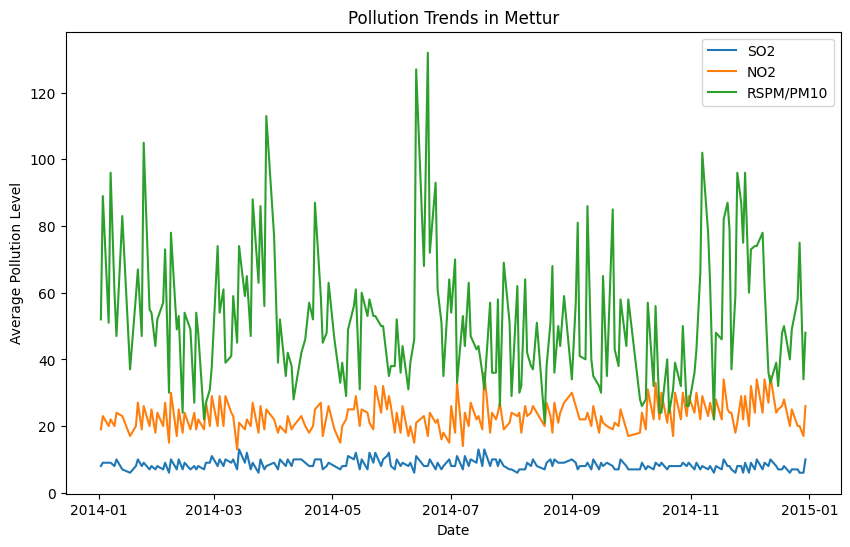

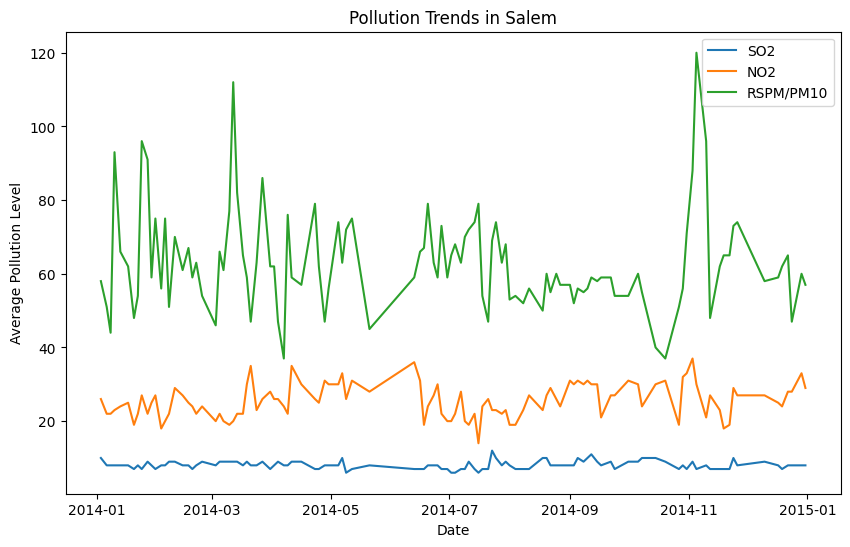

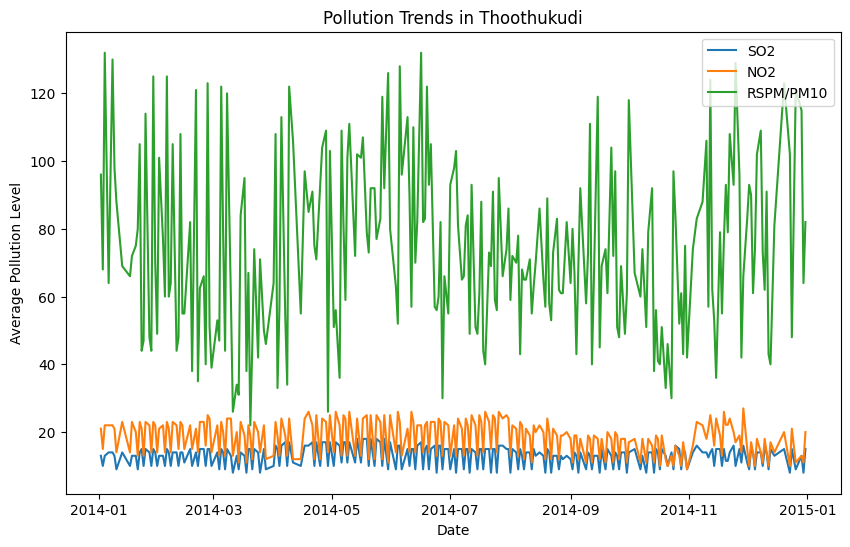

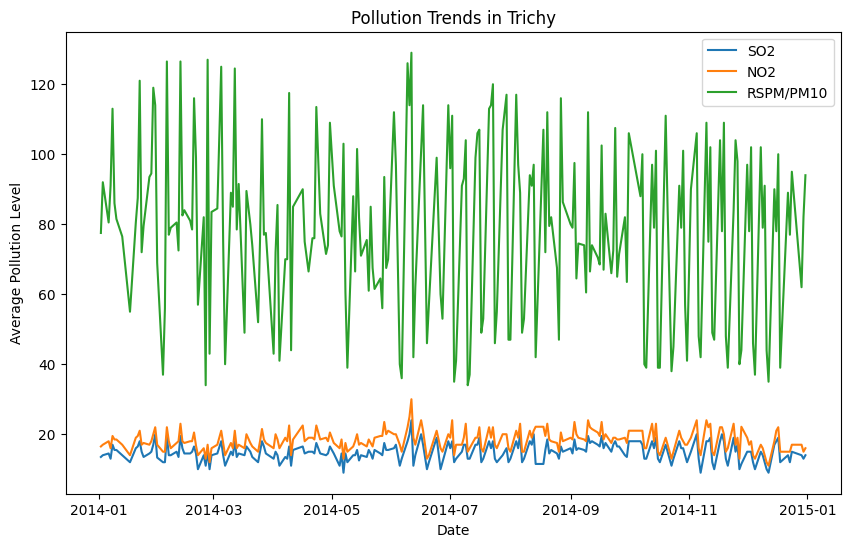

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we have a list of unique locations
unique_locations = avg_levels_by_location_date['City/Town/Village/Area'].unique()

# Plot trends for each location
for location in unique_locations:
    location_data = avg_levels_by_location_date[avg_levels_by_location_date['City/Town/Village/Area'] == location]

    plt.figure(figsize=(10, 6))
    plt.plot(location_data['Sampling Date'], location_data['SO2'], label='SO2')
    plt.plot(location_data['Sampling Date'], location_data['NO2'], label='NO2')
    plt.plot(location_data['Sampling Date'], location_data['RSPM/PM10'], label='RSPM/PM10')
    plt.xlabel('Date')
    plt.ylabel('Average Pollution Level')
    plt.title(f'Pollution Trends in {location}')
    plt.legend()
    plt.show()


In [22]:
# Assuming 'data' is your DataFrame
correlation_matrix = data[['SO2', 'NO2', 'RSPM/PM10']].corr()


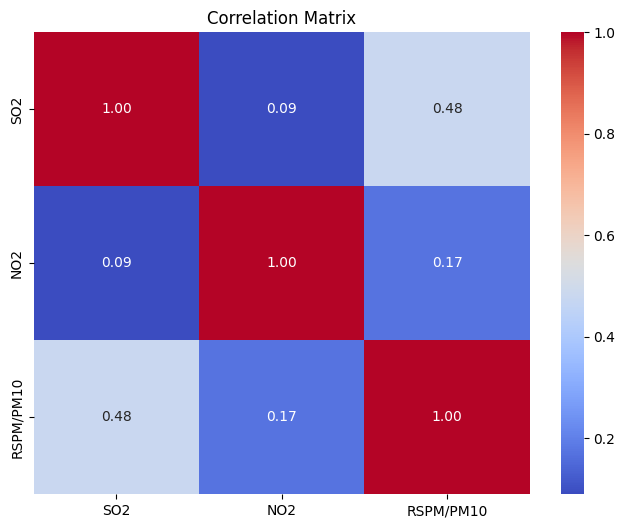

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [24]:
# Assuming 'data' is your DataFrame
X = data[['SO2', 'NO2']]  # Features: SO2 and NO2 levels
y = data['RSPM/PM10']     # Target variable: RSPM/PM10 levels


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 18.518017479238537
MSE: 527.7121788610353
RMSE: 22.9719868287668


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=2)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [31]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Adjust alpha value for desired regularization strength
model.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')


In [34]:
scores

array([-453.44258425, -532.62289603, -503.23958077, -569.03917616,
       -512.04435298])

In [35]:
!pip install filterpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=f3f7f876be65673ec9fe23e4219f7cad353df04030f21aa483c330ec78342ad4
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [36]:
import numpy as np
from filterpy.kalman import KalmanFilter


In [37]:
import numpy as np
from filterpy.kalman import KalmanFilter
import pandas as pd

# Assuming 'data' is your DataFrame
# Make sure to replace placeholders with actual values

# Define initial estimates and covariances
initial_SO2_estimate = data['SO2'].iloc[0]  # Initial SO2 estimate (using first measurement)
initial_NO2_estimate = data['NO2'].iloc[0]  # Initial NO2 estimate (using first measurement)
initial_state_covariance = 10.0  # Adjust as needed
measurement_noise_covariance = 5.0  # Adjust as needed

# Define a 2D Kalman Filter for SO2 and NO2 to predict RSPM/PM10
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([initial_SO2_estimate, initial_NO2_estimate])
kf.F = np.array([[1., 0.], [0., 1.]])
kf.H = np.array([[1., 1.]])
kf.P *= np.eye(2) * initial_state_covariance
kf.R = measurement_noise_covariance

# Iterate through the data
for index, row in data.iterrows():
    measurements = np.array([row['SO2'], row['NO2']])

    # Predict the next state based on the dynamic model (assuming constant)
    predicted_state = kf.predict()

    # Update the state estimate based on the actual RSPM/PM10 measurement
    kf.update(row['RSPM/PM10'])

# Now, you can access the final estimated state using:
final_estimated_SO2 = kf.x[0]
final_estimated_NO2 = kf.x[1]

print(f"Final Estimated SO2 Level: {final_estimated_SO2}")
print(f"Final Estimated NO2 Level: {final_estimated_NO2}")


Final Estimated SO2 Level: 44.75374107001501
Final Estimated NO2 Level: 50.75374107000603


In [38]:
import numpy as np
from filterpy.kalman import KalmanFilter
import pandas as pd

# Assuming 'data' is your DataFrame
# Make sure to replace placeholders with actual values

# Define initial estimates and covariances
initial_SO2_estimate = data['SO2'].iloc[0]  # Initial SO2 estimate (using first measurement)
initial_NO2_estimate = data['NO2'].iloc[0]  # Initial NO2 estimate (using first measurement)
initial_state_covariance = 10.0  # Adjust as needed
measurement_noise_covariance = 5.0  # Adjust as needed

# Define a 2D Kalman Filter for SO2 and NO2 to predict RSPM/PM10
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([initial_SO2_estimate, initial_NO2_estimate])
kf.F = np.array([[1., 0.], [0., 1.]])
kf.H = np.array([[1., 1.]])
kf.P *= np.eye(2) * initial_state_covariance
kf.R = measurement_noise_covariance

# Lists to store actual and predicted RSPM/PM10 levels
actual_rspm = []
predicted_rspm = []

# Iterate through the data
for index, row in data.iterrows():
    measurements = np.array([row['SO2'], row['NO2']])

    # Predict the next state based on the dynamic model (assuming constant)
    predicted_state = kf.predict()

    # Update the state estimate based on the actual RSPM/PM10 measurement
    kf.update(row['RSPM/PM10'])

    # Store actual and predicted RSPM/PM10 levels
    actual_rspm.append(row['RSPM/PM10'])
    predicted_rspm.append(kf.x[0])  # Assuming RSPM/PM10 is the first state variable

# Calculate evaluation metrics
mae = np.mean(np.abs(np.array(actual_rspm) - np.array(predicted_rspm)))
rmse = np.sqrt(np.mean((np.array(actual_rspm) - np.array(predicted_rspm))**2))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 33.18577854309537
Root Mean Squared Error (RMSE): 36.69501036529936


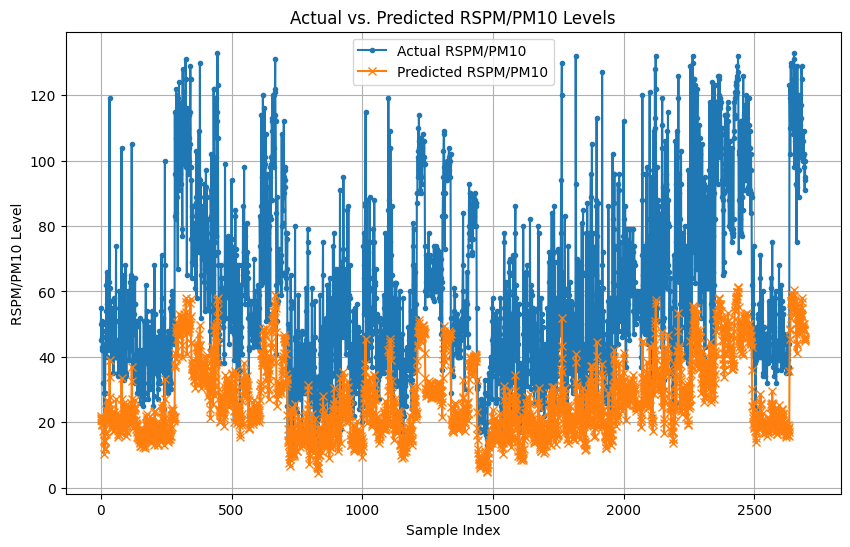

In [39]:
import matplotlib.pyplot as plt

# Assuming 'actual_rspm' and 'predicted_rspm' are already defined

# Create a range of indices for plotting
indices = range(len(actual_rspm))

# Plot actual and predicted RSPM/PM10 levels
plt.figure(figsize=(10, 6))
plt.plot(indices, actual_rspm, label='Actual RSPM/PM10', marker='.')
plt.plot(indices, predicted_rspm, label='Predicted RSPM/PM10', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('RSPM/PM10 Level')
plt.title('Actual vs. Predicted RSPM/PM10 Levels')
plt.legend()
plt.grid(True)
plt.show()
